In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_thcv_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..THCV
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.030928
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.030928
2,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.030928
3,7,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0.030928
4,11,0.260672,-0.019644,0.215790,-0.106098,0.058930,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.030928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.154639
74996,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.154639
74997,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.154639
74998,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.154639


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..THCV'], axis = 1)
y = df_rf[['X..THCV']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.03092784],
       [0.03092784],
       [0.03092784],
       ...,
       [0.15463918],
       [0.15463918],
       [0.15463918]])

<Axes: ylabel='Count'>

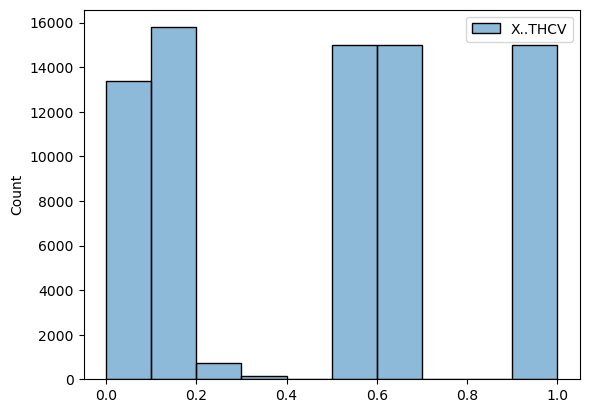

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3199/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.01131442706822162

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.0016804668450637631

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.04099349759490843

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9912958421624637

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9862662343389453

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.108502
1,lsa_1,0.057349
2,lsa_2,0.103441
3,lsa_3,0.069180
4,lsa_4,0.072582
...,...,...
81,tree,0.000147
82,tropical,0.001629
83,vanilla,0.000250
84,violet,0.000030


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
5,hybrid,0.264681
0,lsa_0,0.108502
59,lime,0.104602
2,lsa_2,0.103441
4,lsa_4,0.072582
3,lsa_3,0.069180
48,citrus,0.068155
1,lsa_1,0.057349
45,cheese,0.025364
50,diesel,0.009589


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([1.08021700e-01, 6.14358962e-02, 1.05799928e-01, 6.35802612e-02,
       7.21500456e-02, 2.65068417e-01, 1.85869543e-03, 7.17812528e-04,
       2.03000390e-04, 4.51363541e-04, 1.40625070e-03, 0.00000000e+00,
       3.17013019e-03, 2.52746028e-04, 2.75137036e-04, 3.88199774e-03,
       4.97150327e-03, 1.80925687e-03, 0.00000000e+00, 5.45351006e-03,
       0.00000000e+00, 0.00000000e+00, 2.31102319e-03, 3.98299998e-03,
       5.83015517e-03, 4.17573128e-04, 8.38263221e-03, 5.23119690e-04,
       0.00000000e+00, 5.79753695e-04, 3.67874475e-03, 0.00000000e+00,
       4.52755972e-03, 0.00000000e+00, 0.00000000e+00, 1.76968049e-03,
       4.81986496e-03, 4.96164713e-03, 1.09329686e-04, 2.73818457e-05,
       1.59081087e-05, 3.06673960e-03, 2.86389508e-06, 1.02081569e-03,
       2.32188663e-05, 2.51836777e-02, 1.28844816e-04, 1.58027224e-05,
       6.79136960e-02, 3.85688906e-05, 9.76822847e-03, 6.98176918e-03,
       1.00753032e-03, 2.81959254e-04, 4.02790309e-03, 1.13544716e-03,
      

In [23]:
selector.threshold_

0.011627906976744186

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,cheese,citrus,lime
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,1,0,0
2,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0
3,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0
4,0.260672,-0.019644,0.215790,-0.106098,0.058930,1,0,0,0
...,...,...,...,...,...,...,...,...,...
74995,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1
74996,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1
74997,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1
74998,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,1,1


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_thcv.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_thcv.pkl")

['selected_X_rf_lsa_elbow_thcv.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3199/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.013138237782703385

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.0023324836100977755

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.048295792881966185

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9873896427729143

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9810266834473702

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_thcv.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_thcv.pkl")

['rscv_rf_lsa_elbow_best_params_thcv.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto', min_samples_leaf = 1, max_depth = None)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3199/1145761103.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.014888978415889901

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.0023903205527583847

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.04889090460155533

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9864095951399218

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.980556215566359

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_thcv.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_thcv.pkl")

['y_test_rfreg_lsa_elbow_thcv.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.015543215330813272

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.002669253424522633

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.051664818053706846

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.9779847843445233

Error analysis

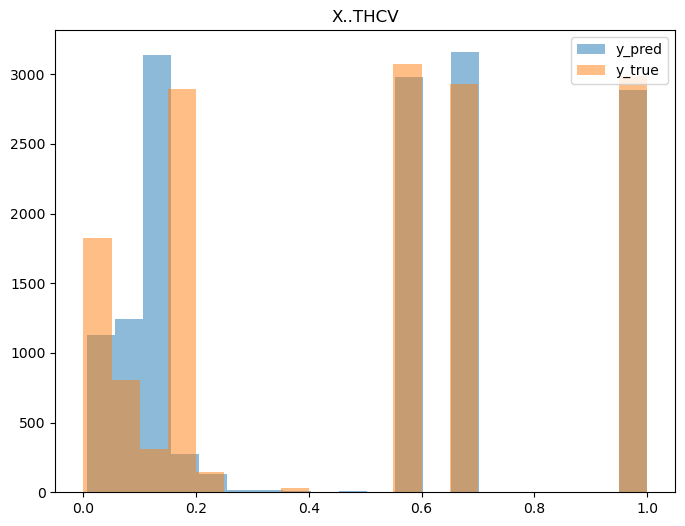

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..THCV"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_thcv.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.989
P-value: 0.000


<Axes: >

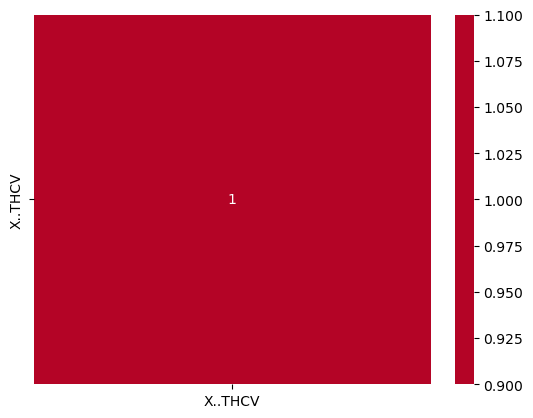

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)